In [1]:
%matplotlib inline

import torch
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir("/content/drive/My Drive/PyTorch/pytorch_start/")



### BROADCASTING

In [ ]:
x = torch.ones(1)
y = torch.ones(3,1)
z = torch.ones(1,3)
a = torch.ones(2,1,1)


In [ ]:
print(" x * y:", (x*y).shape)
print("y * z:", (y*z).shape)
print("y * z * a:", (y*z*a).shape)


 x * y: torch.Size([3, 1])
y * z: torch.Size([3, 3])
y * z * a: torch.Size([2, 3, 3])


### SAMPLE PROBLEM

In [ ]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)


In [ ]:
def model(t_u, w, b):
  return w * t_u + b

def loss_fn(t_p, t_c):
  squares_diffs = (t_p - t_c) ** 2
  return squares_diffs.mean()


### INITIALIZE THE PARAMETERS


In [ ]:
w = torch.ones((1))
b = torch.zeros((1))

t_p = model(t_u, w, b)
print(t_p)


tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])


In [ ]:
loss = loss_fn(t_p, t_c)
print(loss)


tensor(1763.8846)


In [ ]:
delta = 0.1
loss_rate_of_change_w = (loss_fn(model(t_u, w + delta, b), t_c) - loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)

print(loss_rate_of_change_w)


tensor(45.1730)


In [ ]:
learning_rate = 1e-2

w = w - learning_rate * loss_rate_of_change_w

loss_rate_of_change_b = (loss_fn(model(t_u, w, b + delta), t_c) - loss_fn(model(t_u, w, b - delta), t_c)) / (2.0 * delta)


In [ ]:
b = b - learning_rate * loss_rate_of_change_b


### DERIVATIVE:


1.   Loss Function
2.   Model
3.   Combined Loss Function




In [ ]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)


In [ ]:
def model(t_u, w, b):
  return w * t_u + b

def loss_fn(t_p, t_c):
  squares_diffs = (t_p - t_c) ** 2
  return squares_diffs.mean()


In [ ]:
def dloss_fn(t_p, t_c):
  dsq_diffs = 2 * (t_p - t_c) / t_p.size(0) # Taking the mean of the derivatives
  return dsq_diffs

## For derivative of model, since we have two parameters,
def dmodel_dw(t_u, w, b):
  return t_u

def dmodel_db(t_u, w, b):
  return 1.0


In [ ]:
def grad_fn(t_u, t_c, t_p, w, b):
  dloss_dtp = dloss_fn(t_p, t_c)
  dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
  dloss_db = dloss_dtp * dmodel_db(t_u, w, b)

  return torch.stack([dloss_dw.sum(), dloss_db.sum()])


In [ ]:
# Gradient of the first epoch
params = torch.tensor([1.0, 0.0])

t_p = model(t_u, *params)

dloss_dtp = dloss_fn(t_p, t_c)
dloss_dw = dloss_dtp * dmodel_dw(t_u, *params)
dloss_db = dloss_dtp * dmodel_db(t_u, *params)

print(dloss_dtp.sum())
print(dloss_dw.sum())
print(dloss_db.sum())


tensor(82.6000)
tensor(4517.2969)
tensor(82.6000)


In [ ]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):

  for epoch in range(1, n_epochs+1):
    w,b  = params

    t_p = model(t_u, w, b)
    loss = loss_fn(t_p, t_c)
    grad = grad_fn(t_u, t_c, t_p, w, b)

    params = params - learning_rate * grad

    if (epoch % 2) == 0:
      print(" Epoch %d, Loss %.3f" % (epoch, float(loss)))
      print('    Params:', params)
      print('    Grad:  ', grad)
  
  return params

  

In [ ]:
training_loop(n_epochs=10, learning_rate=1e-2, params=torch.tensor([1.0, 0.0]), t_u=t_u, t_c=t_c)


 Epoch 2, Loss 5802485.500
    Params: tensor([2568.4014,   45.1637])
    Grad:   tensor([-261257.4219,   -4598.9712])
 Epoch 4, Loss 64915909902336.000
    Params: tensor([8589999.0000,  151310.8594])
    Grad:   tensor([-8.7385e+08, -1.5393e+07])
 Epoch 6, Loss 726257583152928129024.000
    Params: tensor([2.8732e+10, 5.0610e+08])
    Grad:   tensor([-2.9229e+12, -5.1486e+10])
 Epoch 8, Loss 8125126681682403942989824000.000
    Params: tensor([9.6102e+13, 1.6928e+12])
    Grad:   tensor([-9.7764e+15, -1.7221e+14])
 Epoch 10, Loss 90901154706620645225508955521810432.000
    Params: tensor([3.2144e+17, 5.6621e+15])
    Grad:   tensor([-3.2700e+19, -5.7600e+17])


tensor([3.2144e+17, 5.6621e+15])

THE TRAINING BLEW UP, WE WILL NOT TRY WITH A LOWER LEARNING RATE

In [ ]:
training_loop(n_epochs=11, learning_rate=1e-4, params=torch.tensor([1.0, 0.0]), t_u=t_u, t_c=t_c)


 Epoch 2, Loss 323.091
    Params: tensor([ 0.3623, -0.0118])
    Grad:   tensor([1859.5493,   35.7843])
 Epoch 4, Loss 37.553
    Params: tensor([ 0.2543, -0.0143])
    Grad:   tensor([315.0790,   8.5787])
 Epoch 6, Loss 29.351
    Params: tensor([ 0.2360, -0.0153])
    Grad:   tensor([53.3495,  3.9682])
 Epoch 8, Loss 29.114
    Params: tensor([ 0.2329, -0.0159])
    Grad:   tensor([8.9964, 3.1869])
 Epoch 10, Loss 29.105
    Params: tensor([ 0.2324, -0.0166])
    Grad:   tensor([1.4803, 3.0544])


tensor([ 0.2323, -0.0169])

THE GRADIENT OF "W" AND "B" ARE NOT OF THE SAME SCALE, i.e ONE IS QUITE LARGE OR SMALL THAN THE OTHER. 

THERFORE BY NORMALIZING THE INPUT, WE CAN MAKE IT OF THE SAME SCALE. 


In [ ]:
# In this case, we normalize by simply multiplying with 0.01
t_un = 0.1 * t_u
print(t_un)


params = training_loop(
                      n_epochs = 5000, 
                      learning_rate = 1e-2, 
                      params = torch.tensor([1.0, 0.0]), 
                      t_u = t_un, # <1>
                      t_c = t_c)



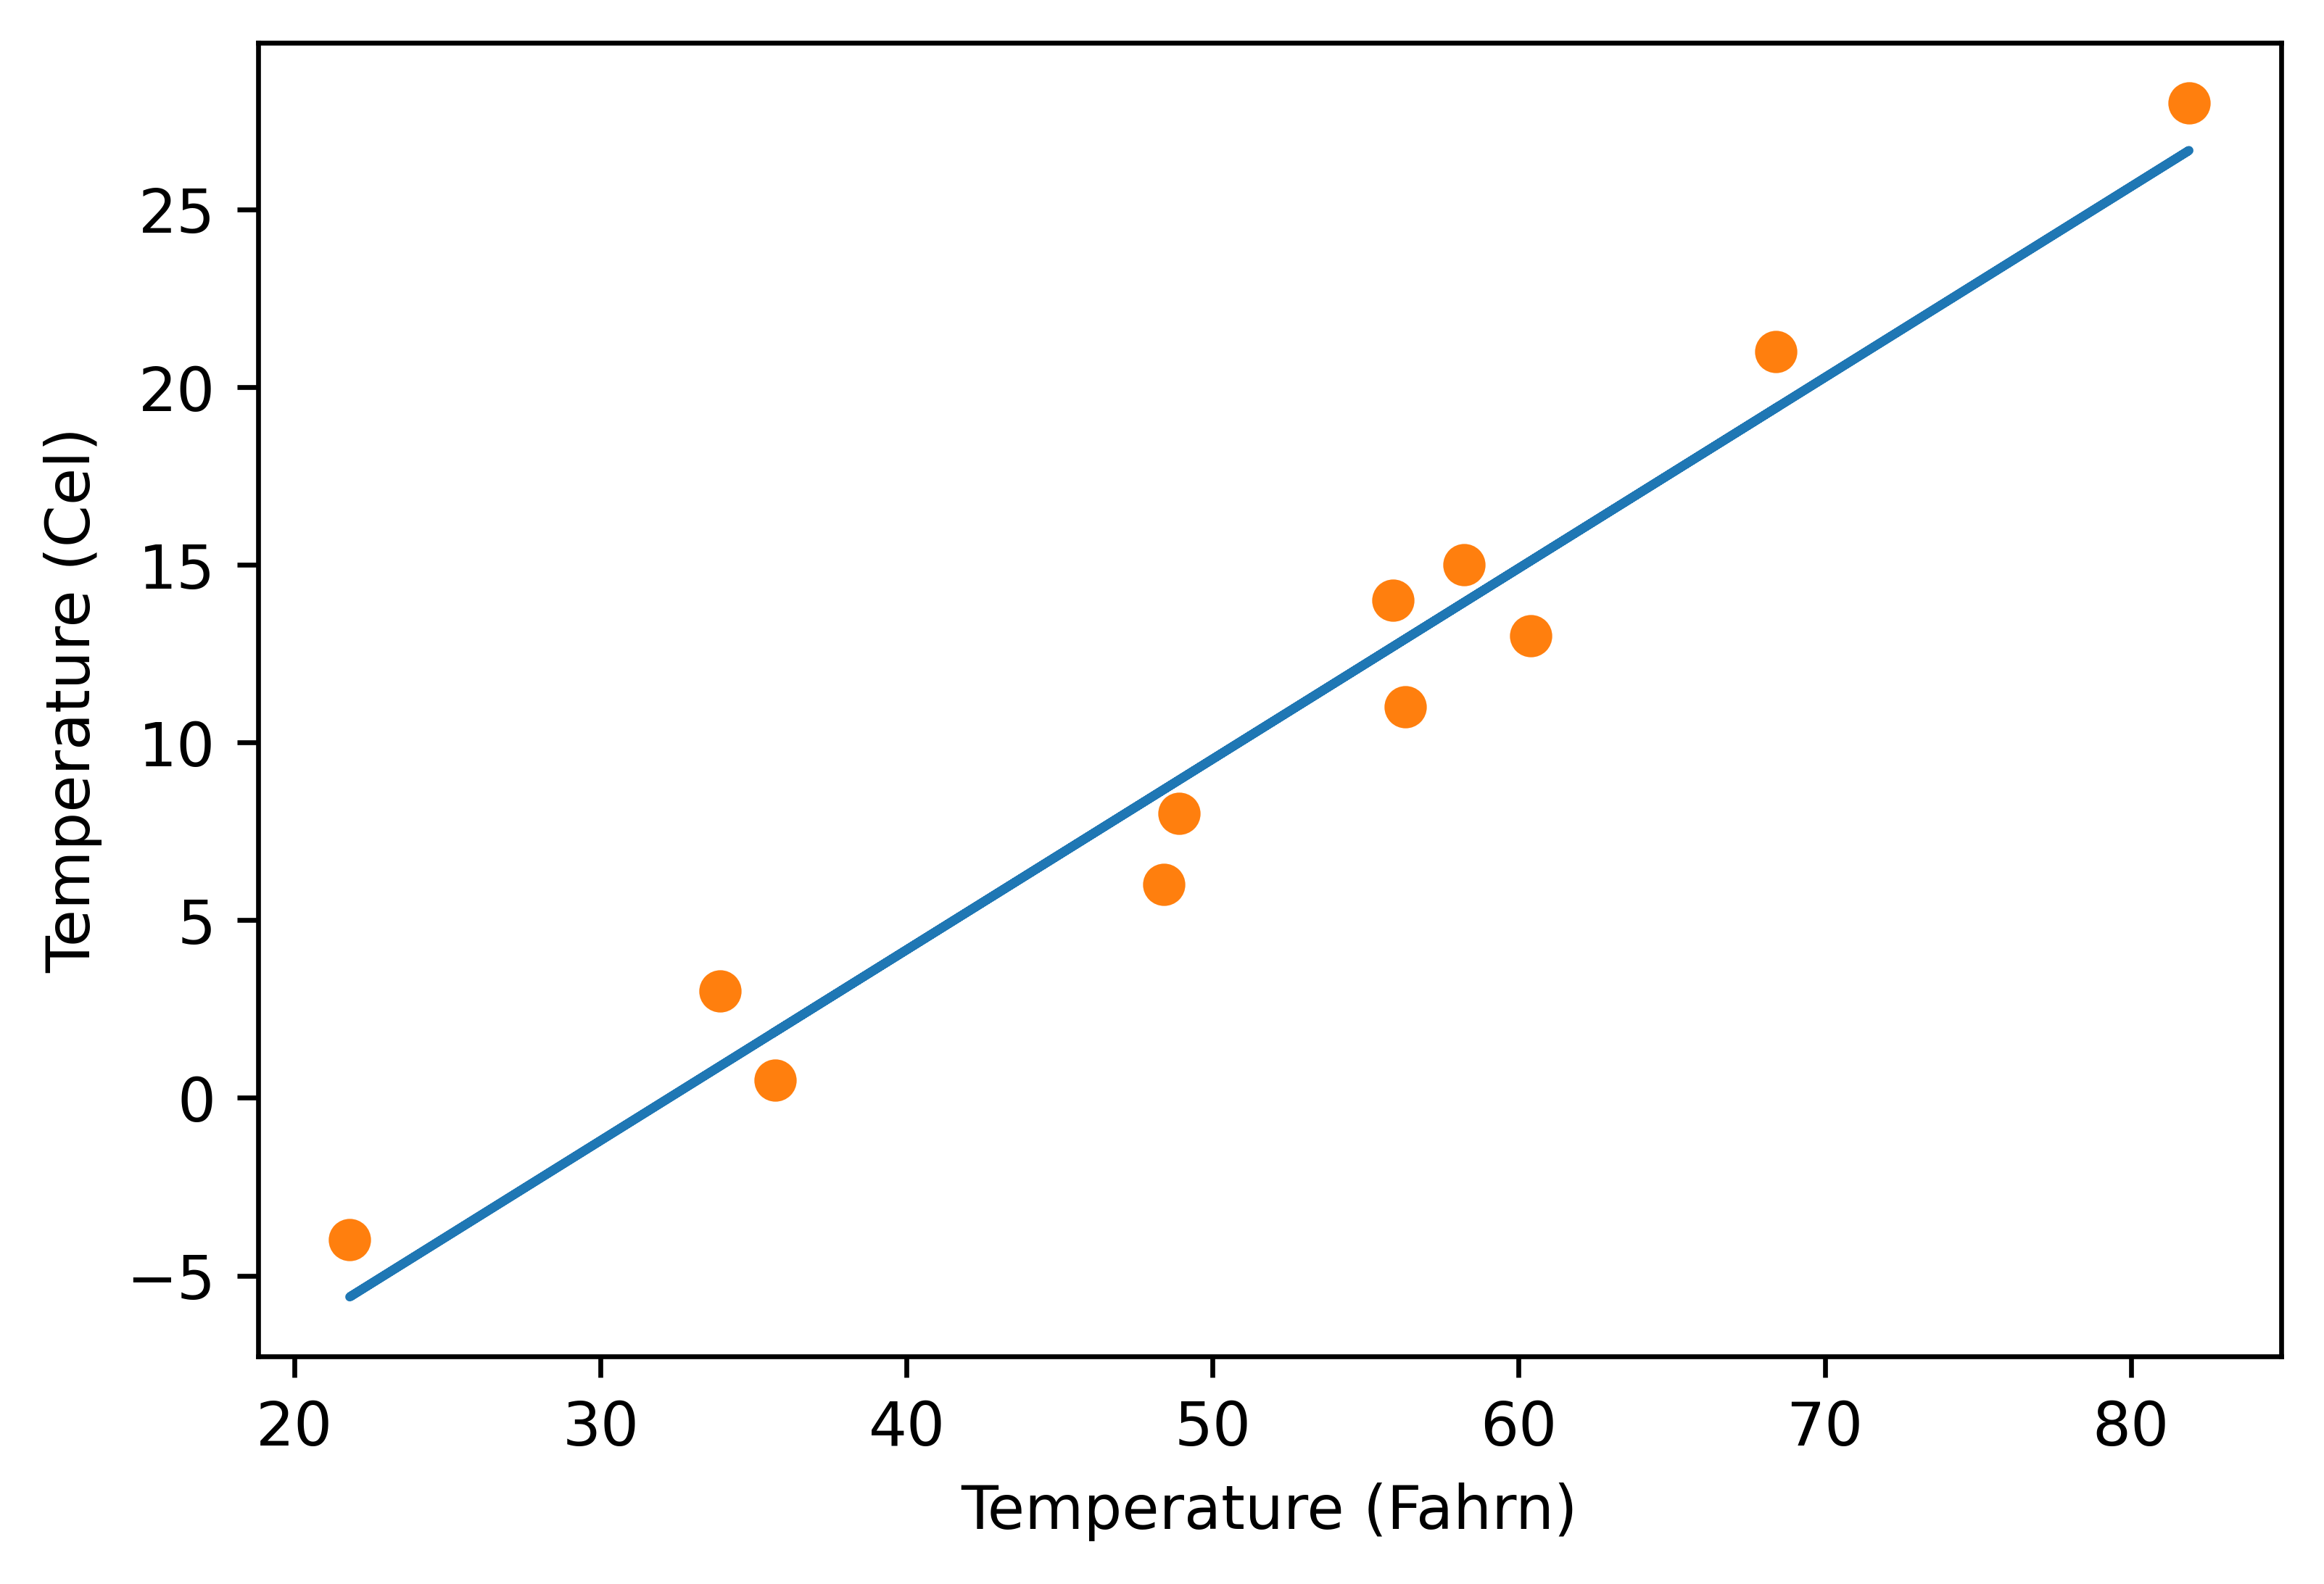

In [ ]:
t_p = model(t_un, *params)
fig = plt.figure(dpi=600)
plt.xlabel("Temperature (Fahrn)")
plt.ylabel("Temperature (Cel)")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), "o")



### COMPUTING THE GRADIENT AUTOMATICALLY

In [ ]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
loss = loss_fn(model(t_u, *params), t_c)
loss.backward()

In [ ]:
print(params.grad)


tensor([4517.2969,   82.6000])


Calling __*backward*__ will lead derivatives to *accumulate* at leaf nodes. 

In order to prevent this from happening, we need to __*zero*__ the __*gradient explicitly*__ at each iteration. 

In [ ]:
if params.grad is not None:
  params.grad.zero_()

print(params.grad)


tensor([0., 0.])


### USING AUTOGRAD

In [ ]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):

  for epoch in range(1, n_epochs + 1):

    if params.grad is not None:
      params.grad.zero_()
    
    t_p = model(t_u, *params)
    loss = loss_fn(t_p, t_c)

    loss.backward()

    with torch.no_grad():
      params -= learning_rate * params.grad
    
    if epoch % 50000 == 0:
      print("epoch %d, loss %f" %(epoch, float(loss)))
  
  return params


In [ ]:
params = torch.tensor([1.0, 0.0], requires_grad=True)

params = training_loop(n_epochs=500000, learning_rate=1e-4, params=torch.tensor([1.0, 0.0], requires_grad=True), 
                       t_u=t_un, t_c=t_c)



epoch 410000, loss 2.927906
epoch 415000, loss 2.927906
epoch 420000, loss 2.927906
epoch 425000, loss 2.927906
epoch 430000, loss 2.927906
epoch 435000, loss 2.927906
epoch 440000, loss 2.927906
epoch 445000, loss 2.927906
epoch 450000, loss 2.927906
epoch 455000, loss 2.927906
epoch 460000, loss 2.927906
epoch 465000, loss 2.927906
epoch 470000, loss 2.927906
epoch 475000, loss 2.927906
epoch 480000, loss 2.927906
epoch 485000, loss 2.927906
epoch 490000, loss 2.927906
epoch 495000, loss 2.927906
epoch 500000, loss 2.927906


In [ ]:
print(params)

tensor([  0.5358, -17.2503], requires_grad=True)


### USING TORCH TO UPDATE PARAMETERS

In [2]:
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])

t_un = 0.1 * t_u


In [50]:
def model(t_u, w, b):
  return w * t_u + b

def loss_fn(t_p, t_c):
  squares_diffs = (t_p - t_c) ** 2
  return squares_diffs.mean()


In [4]:
import torch.optim as optim

dir(optim)


['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'Optimizer',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'lr_scheduler']

In [ ]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-5
optimizer = optim.SGD([params], lr=learning_rate)


In [ ]:
t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c)

# Very Important to zero the gradient.
optimizer.zero_grad()
loss.backward()


### UPDATING THE PARAMETERS  __*optimizer.step()*__

In [ ]:
optimizer.step()


In [ ]:
params

tensor([ 9.5483e-01, -8.2600e-04], requires_grad=True)

In [6]:
def training_loop(n_epochs, optimizer, params, t_u, t_c):

  for epoch in range(1, n_epochs + 1):

    if params.grad is not None:
      params.grad.zero_()
    
    t_p = model(t_u, *params)
    loss = loss_fn(t_p, t_c)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
      print("epoch %d, loss %f" %(epoch, float(loss)))
  
  return params



In [7]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(n_epochs=5000, optimizer= optimizer, params= params, t_u=t_un, t_c = t_c)


epoch 1000, loss 3.828538
epoch 2000, loss 2.957697
epoch 3000, loss 2.928648
epoch 4000, loss 2.927680
epoch 5000, loss 2.927648


tensor([  5.3671, -17.3012], requires_grad=True)

### ADAM OPTIMIZER

In [12]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-1
optimizer = optim.Adam([params], lr=learning_rate)

training_loop(n_epochs=5000, optimizer= optimizer, params= params, t_u=t_u, t_c = t_c)


epoch 1000, loss 3.086700
epoch 2000, loss 2.927646
epoch 3000, loss 2.927645
epoch 4000, loss 2.927645
epoch 5000, loss 2.927646


tensor([  0.5368, -17.3048], requires_grad=True)

### SPLITTING THE DATASET

In [14]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)


In [19]:
shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]


In [21]:
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

train_t_un = train_t_u * 0.1
val_t_un = 0.1 * val_t_u


In [38]:
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):

  for epoch in range(1, n_epochs + 1):

    if params.grad is not None:
      params.grad.zero_()

    train_t_p = model(train_t_u, *params)
    train_loss = loss_fn(train_t_p, train_t_c)

    val_t_p = model(val_t_u, *params)
    val_loss = loss_fn(val_t_p, val_t_c)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if epoch % 500 == 0 or epoch < 5:
      print("epoch %d, Train loss %f, Validataion Loss %f" %(epoch, float(train_loss), float(val_loss)))
  
  return params



In [52]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(n_epochs=4000, optimizer= optimizer, params= params,
              train_t_u=train_t_un, val_t_u = val_t_un, train_t_c=train_t_c, val_t_c = val_t_c)



epoch 1, Train loss 50.375477, Validataion Loss 215.314240
epoch 2, Train loss 22.514757, Validataion Loss 136.378235
epoch 3, Train loss 17.546337, Validataion Loss 111.617584
epoch 4, Train loss 16.645939, Validataion Loss 102.621826
epoch 500, Train loss 9.137214, Validataion Loss 43.923706
epoch 1000, Train loss 5.775165, Validataion Loss 20.346210
epoch 1500, Train loss 4.248534, Validataion Loss 10.108439
epoch 2000, Train loss 3.555324, Validataion Loss 5.775209
epoch 2500, Train loss 3.240555, Validataion Loss 4.020194
epoch 3000, Train loss 3.097623, Validataion Loss 3.366549
epoch 3500, Train loss 3.032722, Validataion Loss 3.166285
epoch 4000, Train loss 3.003251, Validataion Loss 3.140412


tensor([  5.2984, -17.2426], requires_grad=True)

### TORCH NO GRAD (torch.no_grad)

In [41]:
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):

  for epoch in range(1, n_epochs + 1):

    if params.grad is not None:
      params.grad.zero_()

    train_t_p = model(train_t_u, *params)
    train_loss = loss_fn(train_t_p, train_t_c)

    ## The tracking of loss stops and can save us computation and memory\
    ## in case of big new neural networks. 
    with torch.no_grad():
      val_t_p = model(val_t_u, *params)
      val_loss = loss_fn(val_t_p, val_t_c)
      assert val_loss.requires_grad == False

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if epoch % 500 == 0 or epoch < 5:
      print("epoch %d, Train loss %f, Validataion Loss %f" %(epoch, float(train_loss), float(val_loss)))
  
  return params


In [55]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(n_epochs=4000, optimizer= optimizer, params= params,
              train_t_u=train_t_un, val_t_u = val_t_un, train_t_c=train_t_c, val_t_c = val_t_c)



epoch 1, Train loss 50.375477, Validataion Loss 215.314240
epoch 2, Train loss 22.514757, Validataion Loss 136.378235
epoch 3, Train loss 17.546337, Validataion Loss 111.617584
epoch 4, Train loss 16.645939, Validataion Loss 102.621826
epoch 500, Train loss 9.137214, Validataion Loss 43.923706
epoch 1000, Train loss 5.775165, Validataion Loss 20.346210
epoch 1500, Train loss 4.248534, Validataion Loss 10.108439
epoch 2000, Train loss 3.555324, Validataion Loss 5.775209
epoch 2500, Train loss 3.240555, Validataion Loss 4.020194
epoch 3000, Train loss 3.097623, Validataion Loss 3.366549
epoch 3500, Train loss 3.032722, Validataion Loss 3.166285
epoch 4000, Train loss 3.003251, Validataion Loss 3.140412


tensor([  5.2984, -17.2426], requires_grad=True)

### EXERCISE

1. Change model to __*w2 * t_u ** 2 + w1 * t_u + b*__

In [56]:
def model_(t_u, w1, w2, b):
  return w2 * t_u ** 2 + w1 * t_u + b

def loss_fn(t_p, t_c):
  squares_diffs = (t_p - t_c) ** 2
  return squares_diffs.mean()


2. What parts need to change to accomodate the redifinition of model?


--> params


In [59]:
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):

  for epoch in range(1, n_epochs + 1):

    if params.grad is not None:
      params.grad.zero_()

    train_t_p = model_(train_t_u, *params)
    train_loss = loss_fn(train_t_p, train_t_c)

    ## The tracking of loss stops and can save us computation and memory\
    ## in case of big new neural networks. 
    with torch.no_grad():
      val_t_p = model_(val_t_u, *params)
      val_loss = loss_fn(val_t_p, val_t_c)
      assert val_loss.requires_grad == False

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if epoch % 500 == 0 or epoch < 5:
      print("epoch %d, Train loss %f, Validataion Loss %f" %(epoch, float(train_loss), float(val_loss)))
  
  return params





In [60]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-4
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(n_epochs=10000, optimizer= optimizer, params= params,
              train_t_u=train_t_un, val_t_u = val_t_un, train_t_c=train_t_c, val_t_c = val_t_c)



epoch 1, Train loss 564.459412, Validataion Loss 1176.801392
epoch 2, Train loss 378.130402, Validataion Loss 758.877380
epoch 3, Train loss 254.307022, Validataion Loss 487.739807
epoch 4, Train loss 172.020950, Validataion Loss 312.926971
epoch 500, Train loss 7.954937, Validataion Loss 30.893021
epoch 1000, Train loss 7.047817, Validataion Loss 25.809198
epoch 1500, Train loss 6.281770, Validataion Loss 21.754438
epoch 2000, Train loss 5.634861, Validataion Loss 18.549419
epoch 2500, Train loss 5.088557, Validataion Loss 16.044235
epoch 3000, Train loss 4.627218, Validataion Loss 14.113746
epoch 3500, Train loss 4.237623, Validataion Loss 12.653594
epoch 4000, Train loss 3.908618, Validataion Loss 11.576854
epoch 4500, Train loss 3.630778, Validataion Loss 10.811252
epoch 5000, Train loss 3.396153, Validataion Loss 10.296769
epoch 5500, Train loss 3.198013, Validataion Loss 9.983664
epoch 6000, Train loss 3.030687, Validataion Loss 9.830799
epoch 6500, Train loss 2.889384, Validatai

tensor([-1.2557,  0.6343, -0.9019], requires_grad=True)

3. Is the resulting loss higher or lower?

--> Training loss is lower but the validation loss is higher.

4. Is the actual result better or worse?

--> The actual result is worse. 